In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

4.5.4


In [3]:
import cufflinks as cf

In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

In [6]:
data=pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
### no of rows and columns
print ( "Number of Rows:" , data.shape [ 0 ] )
print ( "Number of Columns:" , data.shape [ 1 ] )

Number of Rows: 39644
Number of Columns: 61


In [8]:
## types of variable
print('Types of Variable')
print ( "\n")
print( data.dtypes )

Types of Variable


url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max   

In [9]:
### number of rows and null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [10]:
## statistical describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [11]:
## making copy for to do EDA
df=data.copy()

In [12]:
df['url'].value_counts()

http://mashable.com/2014/04/11/linkedin-apps-2014/                                                  1
http://mashable.com/2014/10/27/interview-questions-ask-employers/                                   1
http://mashable.com/2013/04/06/dogs-eating-like-humans/                                             1
http://mashable.com/2013/06/23/students-professional-organizations/                                 1
http://mashable.com/2013/07/24/facebooks-q2-earnings-charts/                                        1
http://mashable.com/2013/04/25/star-wars-animal-parody/                                             1
http://mashable.com/2014/09/05/kickstarter-reddit-top-tech-firms-plan-to-go-slow/                   1
http://mashable.com/2014/05/15/google-glass-foursquare/                                             1
http://mashable.com/2014/12/18/obesity-european-court/                                              1
http://mashable.com/2014/01/27/music-monday-2014-grammy-awards/                   

In [13]:
## droping url because not use in dataset
df=df.drop('url',axis=1 )

In [14]:
## creating categorical value from cntinous variable 
df['share'] = df[' shares'].apply(lambda x: 1 if x>1400 else 0)

In [15]:
df['share'].value_counts()

0    20082
1    19562
Name: share, dtype: int64

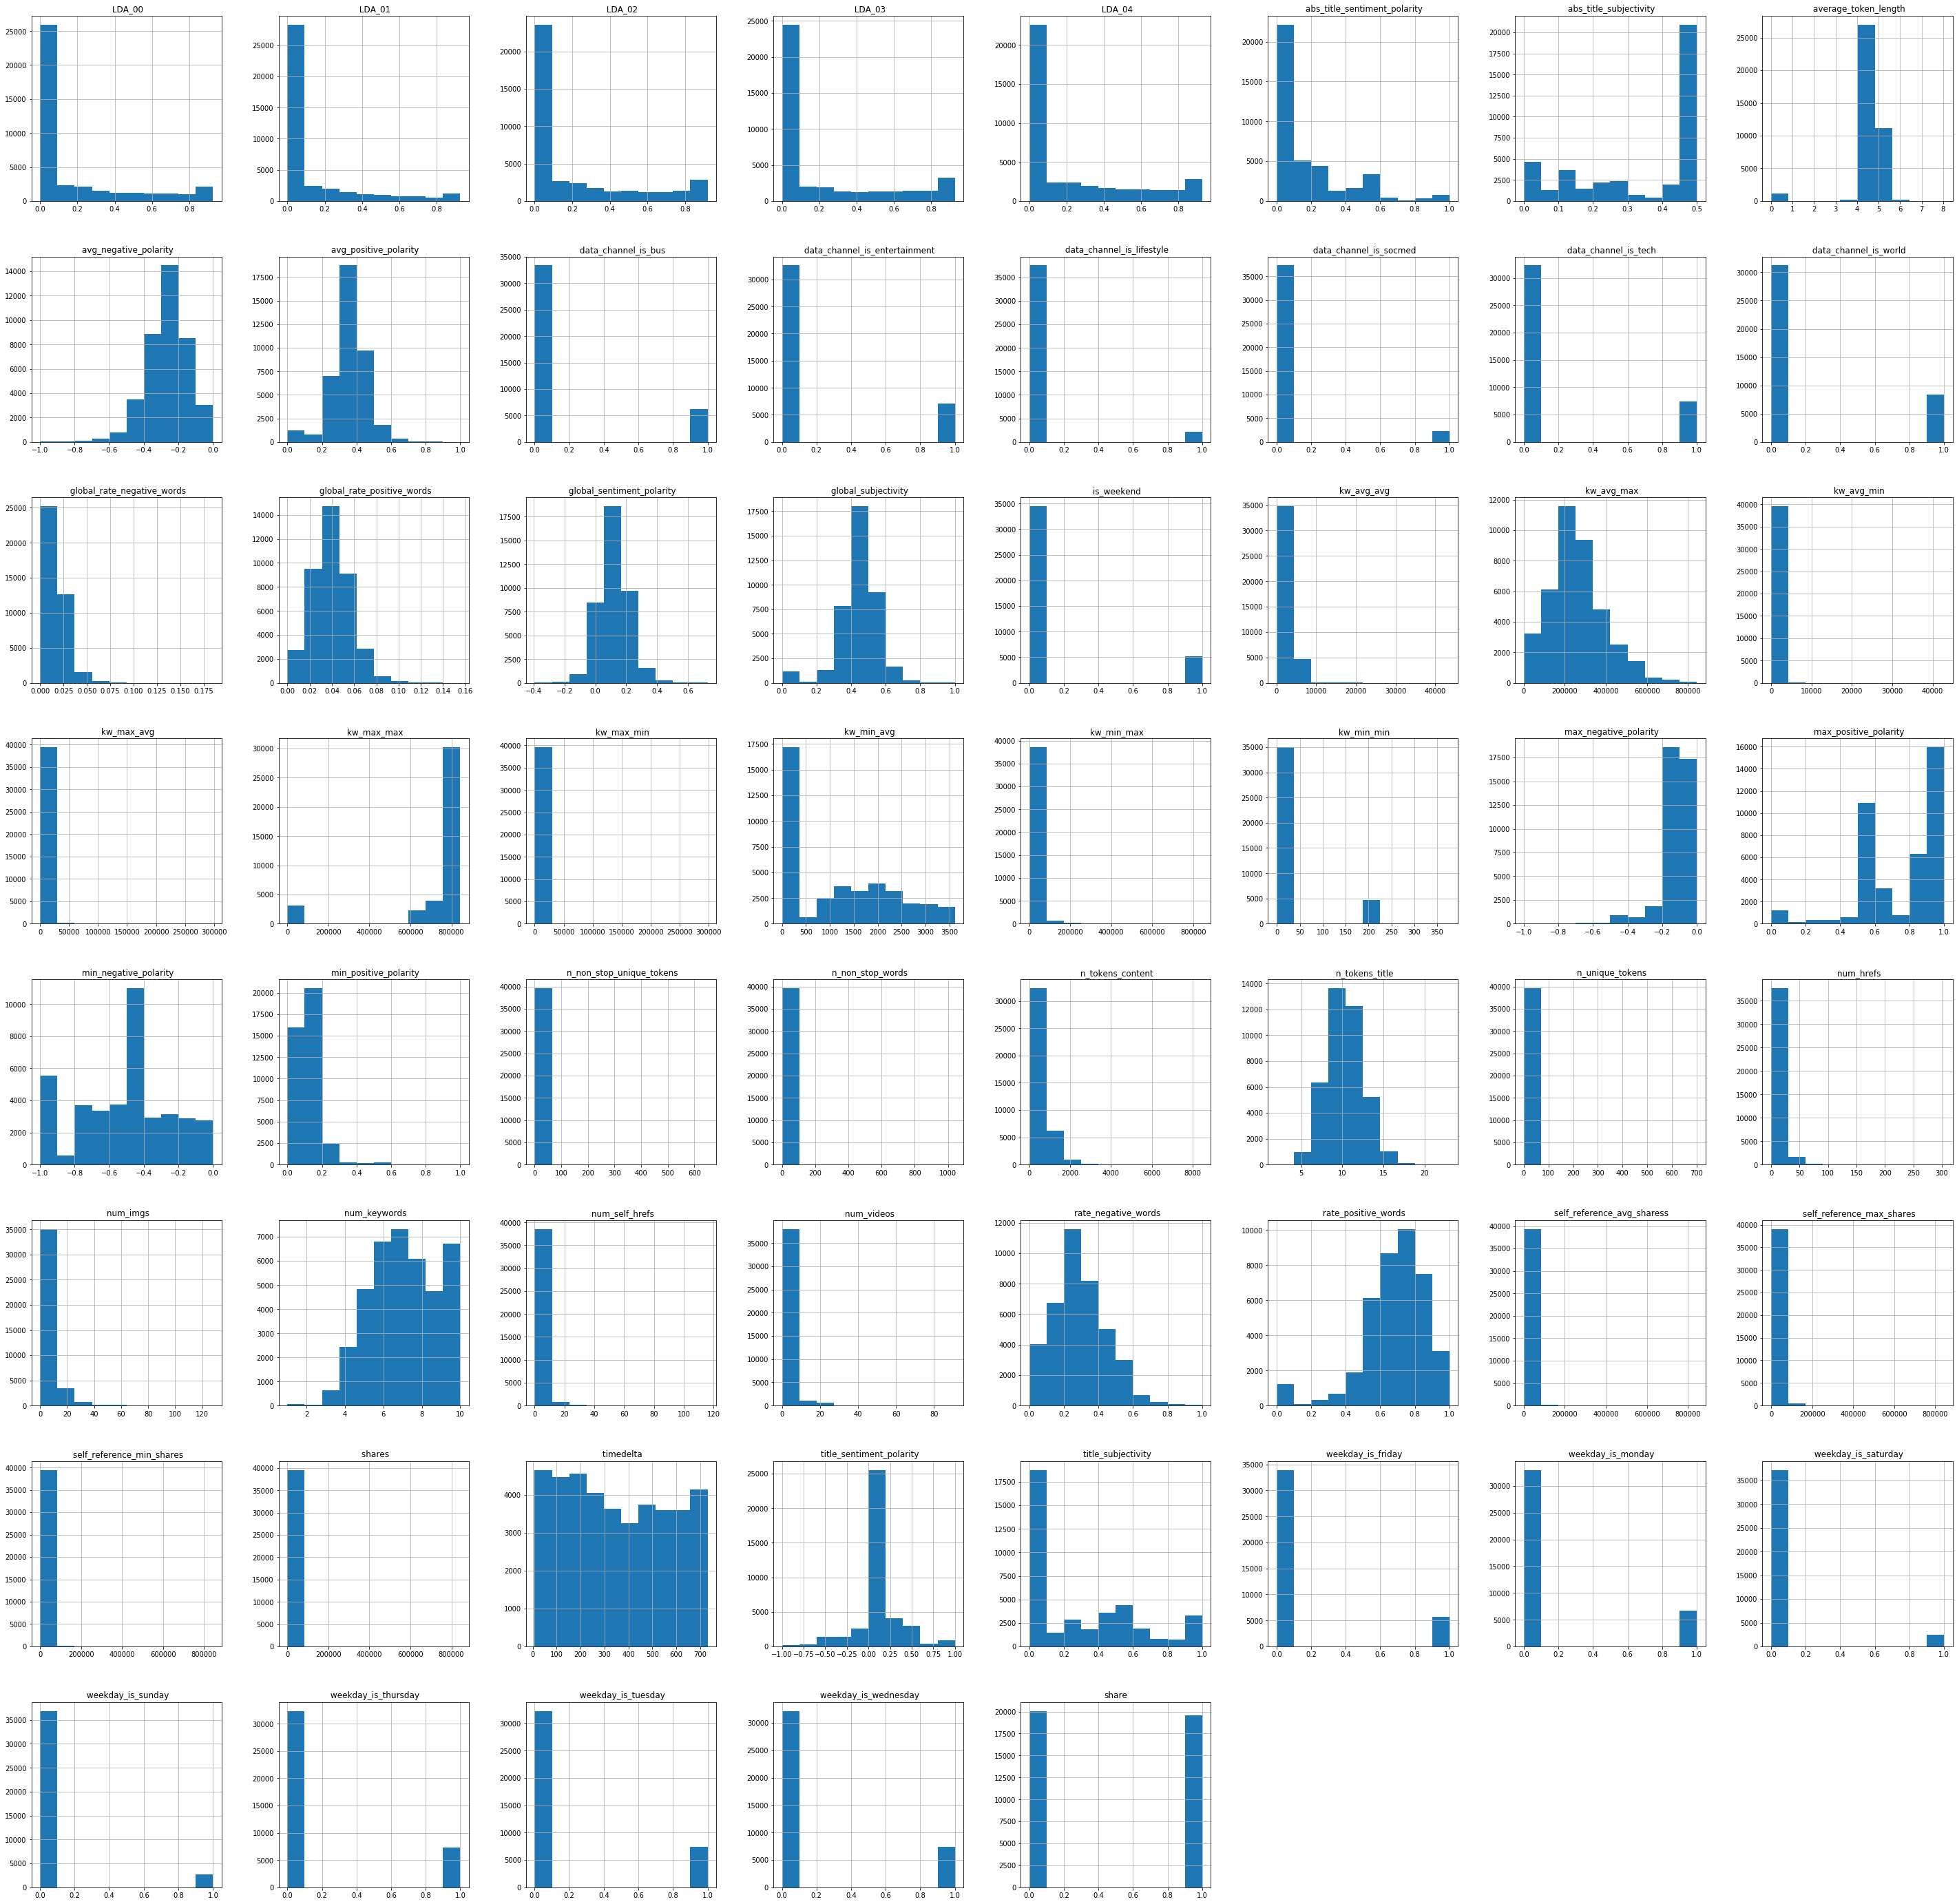

In [16]:
df.hist(figsize=(50,50))
plt.show()

In [17]:
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

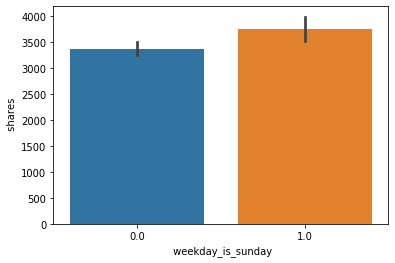

In [18]:
sns.barplot(x=' weekday_is_sunday',y=' shares',data=df)
plt.show()

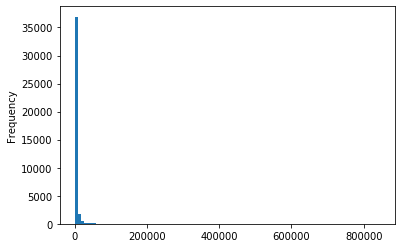

In [19]:
## creatinf histogram on target column
df[' shares'].plot(kind='hist',bins=100  )
plt.show()

In [20]:


## creatinf histogram on target column from ploty 
df[' shares'].iplot(kind='hist',bins=100 )
plt.show()

### EDA ON DAYS

In [21]:
### creating pivot table for days 

In [22]:
weekdays=[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',
           ' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',
          ' is_weekend']


In [23]:
df_1=pd.pivot_table(df,values=weekdays,columns=df['share'])

In [24]:
df_1['Percenatge_published_on_day']=(df_1[1]/(df_1[1]+df_1[0]))*100 

In [25]:
df_1

share,0,1,Percenatge_published_on_day
is_weekend,0.085101,0.177947,67.648093
weekday_is_friday,0.141221,0.146457,50.910118
weekday_is_monday,0.175331,0.160515,47.794251
weekday_is_saturday,0.036500,0.087926,70.664996
weekday_is_sunday,0.048601,0.090021,64.940151
weekday_is_thursday,0.193457,0.172886,47.192438
weekday_is_tuesday,0.200727,0.171710,46.104506
weekday_is_wednesday,0.204163,0.170484,45.505184


In [26]:
## making list for proper name 
day=['Weekend','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']

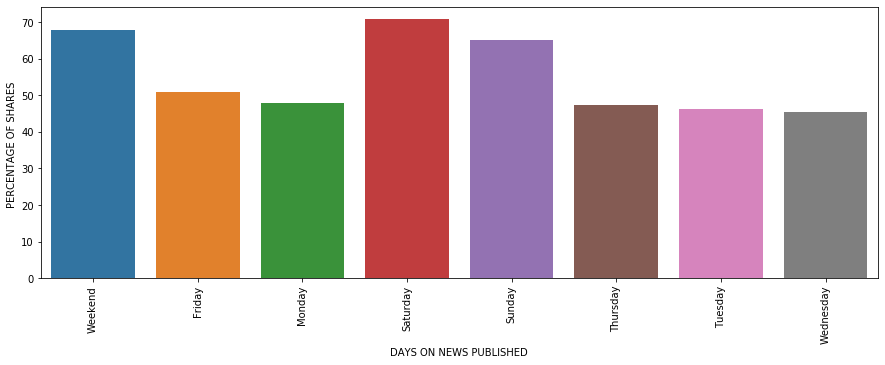

In [27]:
## ploting as per their share 
plt.figure(figsize=(15,5))
sns.barplot(x=day ,y='Percenatge_published_on_day',data=df_1) # passed x= day for proper name on x-axis
plt.xticks(rotation=90 )
plt.xlabel('DAYS ON NEWS PUBLISHED')
plt.ylabel('PERCENTAGE OF SHARES ')
plt.show()

From above we can say that,
* the article sale on weekend ,saturday and sunday have high contribution share as compare to other days
* where monday ,tuesday,thursday and wednesday have approximately same in between 45 to 50 

In [28]:
## using groupby

df.groupby('share')[' weekday_is_monday',' weekday_is_tuesday'].count()

,weekday_is_monday,weekday_is_tuesday
share,,
0,20082,20082
1,19562,19562


In [29]:
df.groupby('share').count()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
share,,,,,,,,,,,,,,,,,,,,,
0,20082,20082,20082,20082,20082,20082,20082,20082,20082,20082,...,20082,20082,20082,20082,20082,20082,20082,20082,20082,20082
1,19562,19562,19562,19562,19562,19562,19562,19562,19562,19562,...,19562,19562,19562,19562,19562,19562,19562,19562,19562,19562


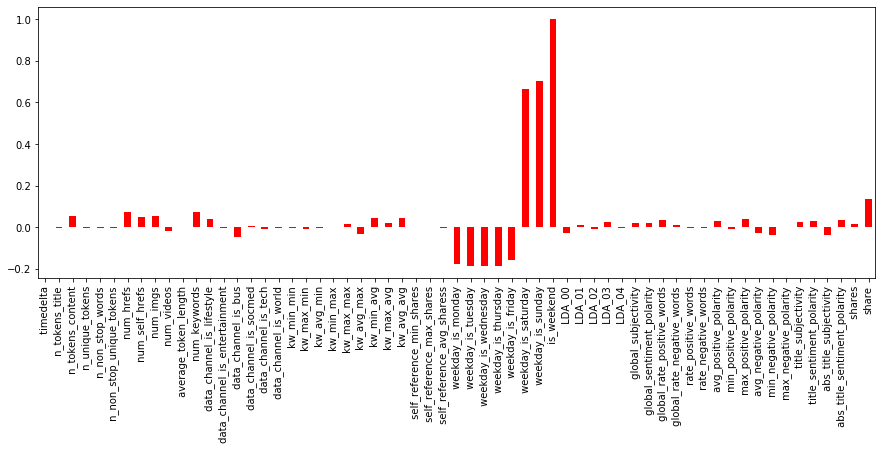

In [30]:
## plotting bar plot as per the correlation
plt.figure(figsize=(15,5))
df.corr()[' is_weekend'].plot(kind='bar',color='red')
plt.show()

* weekend is only correlated with sunday and saturday 

## EDA ON LDA

In [31]:
LDA=[' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04']
LDA

[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']

In [32]:
df_2=pd.pivot_table(df,values=LDA,columns=df['share'])
df_2

share,0,1
LDA_00,0.167776,0.201870
LDA_01,0.157658,0.124418
LDA_02,0.259893,0.171591
LDA_03,0.205707,0.242312
LDA_04,0.208967,0.259758


In [33]:
df_2['Percenatge_LDA']=(df_2[1]/(df_2[1]+df_2[0]))*100 

In [34]:
df_2

share,0,1,Percenatge_LDA
LDA_00,0.167776,0.201870,54.611752
LDA_01,0.157658,0.124418,44.108034
LDA_02,0.259893,0.171591,39.767702
LDA_03,0.205707,0.242312,54.085205
LDA_04,0.208967,0.259758,55.417953


In [35]:
topic=['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4']

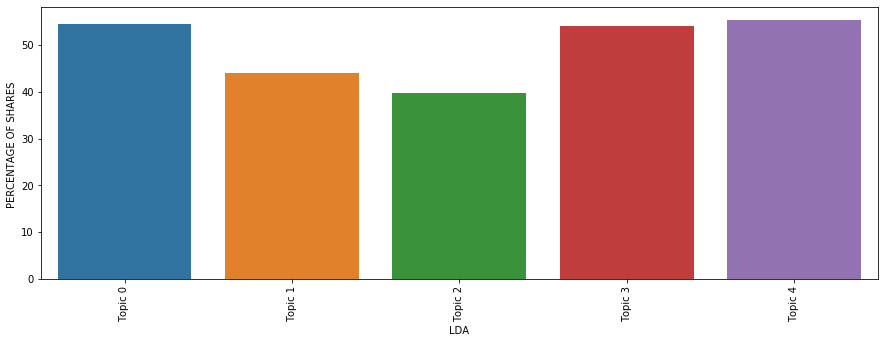

In [36]:
## ploting as per their share 
plt.figure(figsize=(15,5))
sns.barplot(x=topic ,y='Percenatge_LDA',data=df_2) # passed x= topic for proper name on x-axis
plt.xticks(rotation=90 )
plt.xlabel('LDA')
plt.ylabel('PERCENTAGE OF SHARES ')
plt.show()

Fromm above we can say that
*  Topic 0,3 and 4 have approximately same % of share 54 
*  Topic 1 & 2 have less % of share as compare to LDA 0,3,4 

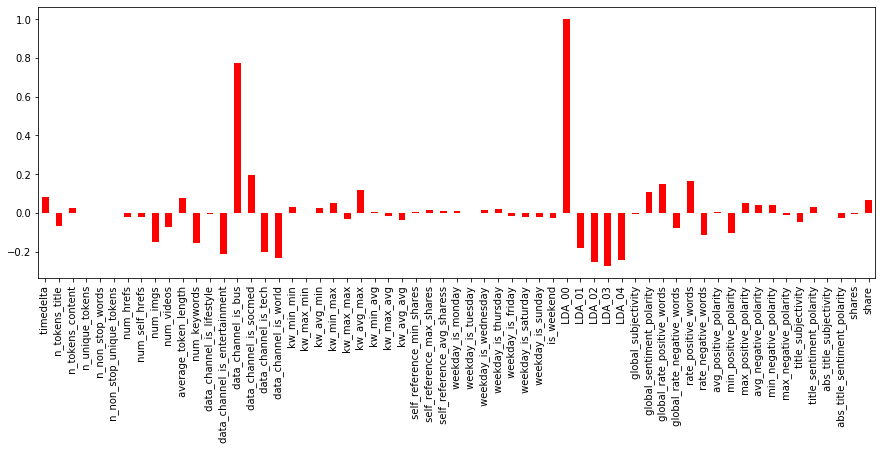

In [37]:
## plotting bar plot as per the correlation
plt.figure(figsize=(15,5))
df.corr()[' LDA_00'].plot(kind='bar',color='red')
plt.show()

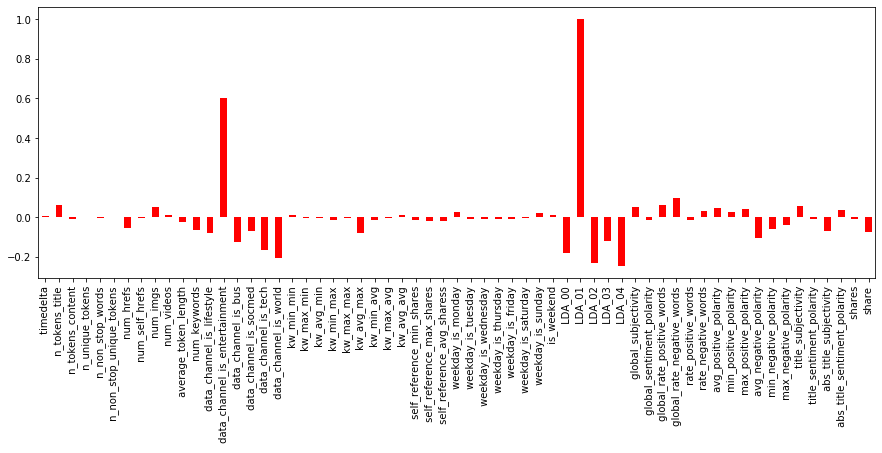

In [38]:
## plotting bar plot as per the correlation
plt.figure(figsize=(15,5))
df.corr()[' LDA_01'].plot(kind='bar',color='red')
plt.show()

## EDA ON NUMBER OF TOKENS

In [39]:
za=df[' n_tokens_title'].unique()

In [40]:
df[' shares'].head()

0     593
1     711
2    1500
3    1200
4     505
Name:  shares, dtype: int64

In [41]:
df['share'].head()

0    0
1    0
2    1
3    0
4    0
Name: share, dtype: int64

In [42]:
df[' n_tokens_title']=df[' n_tokens_title'].astype('int')

In [43]:
df[' n_tokens_title'].value_counts()

10    7358
11    6960
9     6278
12    5299
8     4227
13    3509
7     2120
14    1733
6      805
15     756
16     259
5      184
17      91
4       28
18      22
19       6
3        5
20       2
23       1
2        1
Name:  n_tokens_title, dtype: int64

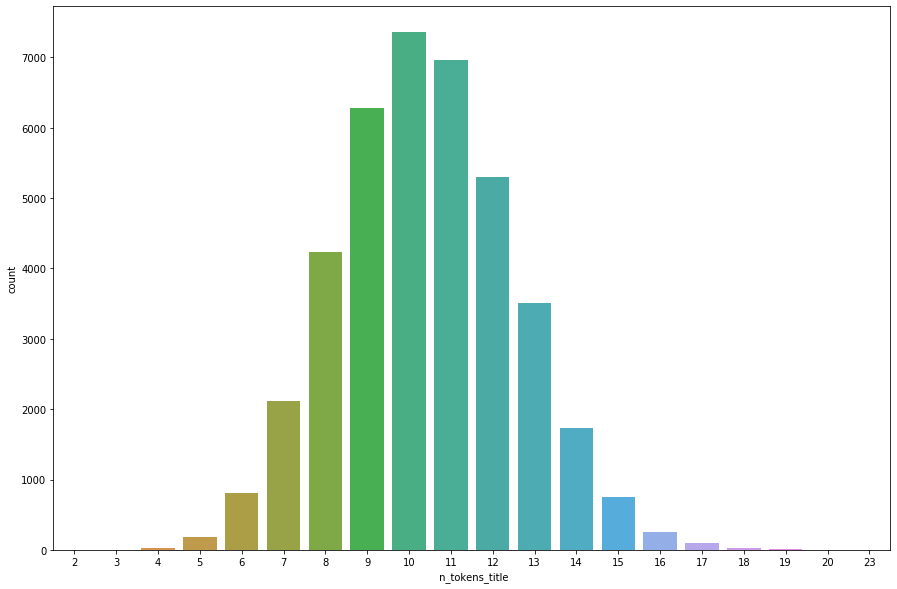

In [44]:
plt.figure(figsize=(15,10 ))
sns.countplot(df[' n_tokens_title'])
plt.show()

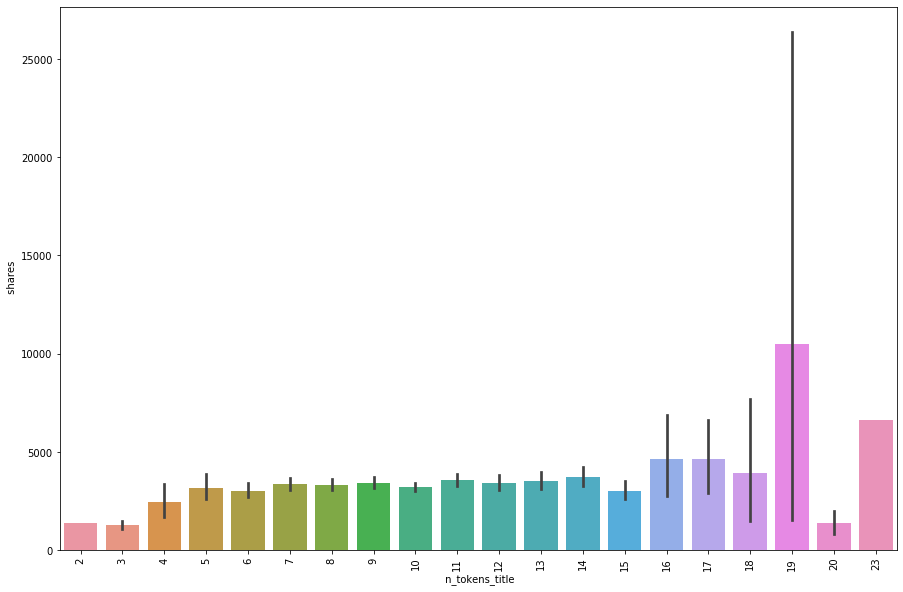

In [45]:
plt.figure(figsize=(15,10 ))
sns.barplot(x=' n_tokens_title',y=' shares',data=df)
plt.xticks(rotation=90 )
plt.show()

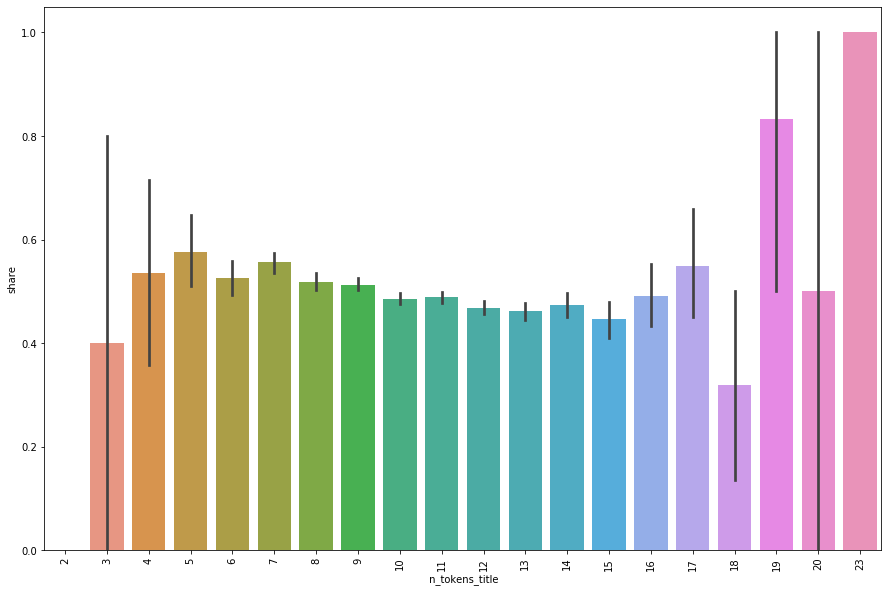

In [46]:
plt.figure(figsize=(15,10 ))
sns.barplot(df[' n_tokens_title'],df['share'])
plt.xticks(rotation=90 )
plt.show()

# EDA ON DATA CHANNEL

In [47]:
channels = [' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',
                 ' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world']

In [48]:
df_3=pd.pivot_table(df,values=channels,columns=df['share'])
df_3

share,0,1
data_channel_is_bus,0.160791,0.154841
data_channel_is_entertainment,0.219749,0.135160
data_channel_is_lifestyle,0.044766,0.061343
data_channel_is_socmed,0.033064,0.084807
data_channel_is_tech,0.148740,0.222830
data_channel_is_world,0.273429,0.150087


In [49]:
## creating column for % of pouplarity 
df_3['Percenatge_of_popular_channel']=(df_3[1]/(df_3[1]+df_3[0]))*100 

In [50]:
## creating column for total contribution of channel i overall shares

df_3['Total']=(df_3[0]+df_3[1])*100

In [51]:
df_3

share,0,1,Percenatge_of_popular_channel,Total
data_channel_is_bus,0.160791,0.154841,49.057487,31.563178
data_channel_is_entertainment,0.219749,0.135160,38.082999,35.490903
data_channel_is_lifestyle,0.044766,0.061343,57.811225,10.610988
data_channel_is_socmed,0.033064,0.084807,71.948796,11.787172
data_channel_is_tech,0.148740,0.222830,59.969828,37.157014
data_channel_is_world,0.273429,0.150087,35.438321,42.351584


In [52]:
channel=['Bussiness','Entertainment','Lifestyle','Social Media','Technology','World information']

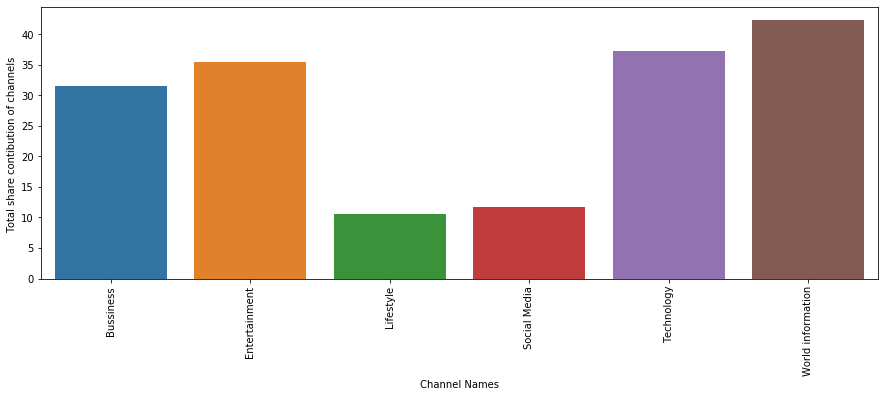

In [53]:
## ploting as per their total shares in datachaneel
plt.figure(figsize=(15,5))
sns.barplot(x=channel ,y='Total',data=df_3)
plt.xticks(rotation=90 )
plt.xlabel(' Channel Names ')
plt.ylabel('Total share contibution of channels ')
plt.show()

From above graph we can say that,
* World data channel have most shares as compare to other channel
* Where Technology,Bussiness and Entertainment also have great contribution 
* but Lifestyle and Social media channels are not have that much shares it on;y have 10.61 and 11.78% shares respectively

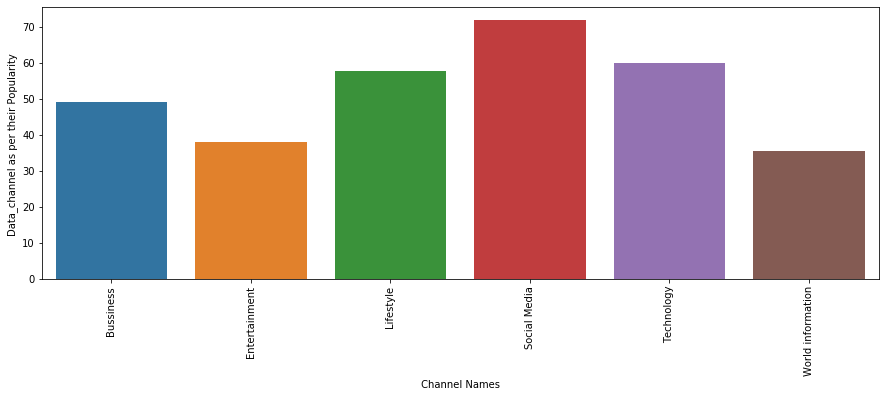

In [54]:
## ploting as per their share / popularity
plt.figure(figsize=(15,5))
sns.barplot(x=channel ,y='Percenatge_of_popular_channel',data=df_3)
plt.xticks(rotation=90 )
plt.xlabel(' Channel Names ')
plt.ylabel('Data_channel as per their Popularity ')
plt.show()

From above graph we can say that,
* Social media data channel is most popular as compare to other channel 
* world info and Entertainment is least in popularity

### FROM BOTH BARPLOTS WE CAN CONCLUDE THAT,
*  WORLD channel have most numbers of shares but still in case iof popularity its the least one 
*  where SOCIAL MEDIA channel have least number of sale still in the case of popularity it stand first
*  LIFESTYLE channel also popular and have less number of shares

# EDA ON CATEGORY

In [55]:
category=[' num_videos',' num_imgs']

In [56]:
df_4=pd.pivot_table(df,values=category,columns=df['share'])

In [57]:
df_4['Percenatge_of_popular_asper_category']=(df_4[1]/(df_4[1]+df_4[0]))*100 
df_4

share,0,1,Percenatge_of_popular_asper_category
num_imgs,3.994672,5.108220,56.116453
num_videos,1.211682,1.289081,51.547503


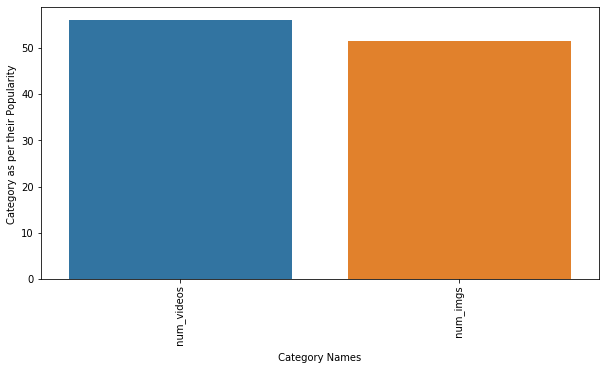

In [58]:
## ploting as per their share / popularity
plt.figure(figsize=(10 ,5))
sns.barplot(x=category ,y='Percenatge_of_popular_asper_category',data=df_4)
plt.xticks(rotation=90 )
plt.xlabel(' Category Names ')
plt.ylabel('Category as per their Popularity ')
plt.show()

* both the video and images are popularity is approximately same but still as per contribution of shares of image is high 

# EDA ON KEYWORD

In [59]:
## only taking avg value

keyword=[' kw_avg_min',' kw_avg_max',' kw_avg_avg']

In [60]:
df_5=pd.pivot_table(df,values=keyword,columns=df['share'])

In [61]:
df_5['Percenatge_of_word_contribution']=(df_5[1]/(df_5[1]+df_5[0]))*100 


## creating column for total contribution of channel i overall shares

df_5['Total_avg_keyword']=(df_5[0]+df_5[1])

df_5

share,0,1,Percenatge_of_word_contribution,Total_avg_keyword
kw_avg_avg,2925.029644,3352.291922,53.403221,6277.321566
kw_avg_max,257074.251864,261548.309345,50.431340,518622.561209
kw_avg_min,288.903837,336.453797,53.801821,625.357634


In [62]:
word=['Average keyword','Best keyword','Worst keyword']

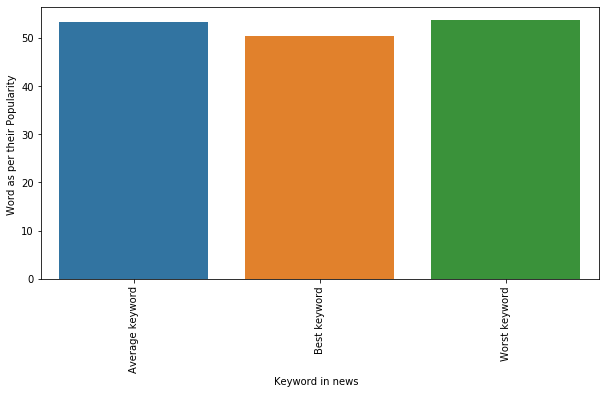

In [63]:
## ploting as per their share / popularity
plt.figure(figsize=(10 ,5))
sns.barplot(x=word ,y='Percenatge_of_word_contribution',data=df_5)
plt.xticks(rotation=90 )
plt.xlabel('Keyword in news  ')
plt.ylabel('Word as per their Popularity ')
plt.show()

* all average keyword are approximately are same shares
* most of the keywords are best keywords

In [64]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share
0,731.0,12,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,731.0,9,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


## for checking polarity contribution

In [65]:
polarity=[' avg_negative_polarity',' avg_positive_polarity']

In [66]:
df_6=pd.pivot_table(df,values=polarity,columns=df['share'])
df_6

share,0,1
avg_negative_polarity,-0.258805,-0.260262
avg_positive_polarity,0.350916,0.356811


In [67]:
df_6['Percenatge_of_polarity']=(df_6[1]/(df_6[1]+df_6[0]))*100 

In [68]:
df_6

share,0,1,Percenatge_of_polarity
avg_negative_polarity,-0.258805,-0.260262,50.140384
avg_positive_polarity,0.350916,0.356811,50.416439


* all avg_negative_polarity and avg_positive_polarity  keyword are approximately are same shares


In [69]:
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

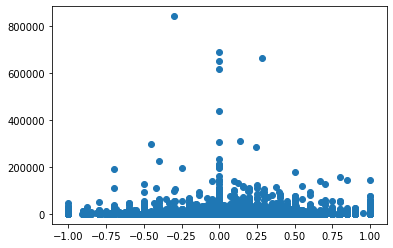

In [70]:
plt.scatter(df[' title_sentiment_polarity'],df[' shares'])
plt.show()

* no relation between title and shares

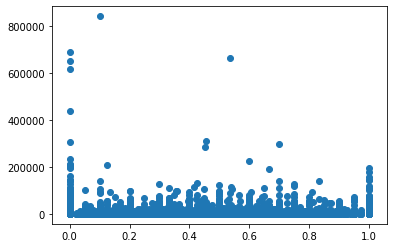

In [71]:
plt.scatter(df[' title_subjectivity'],df[' shares'])
plt.show()

* no relation between title_subjectivity and shares

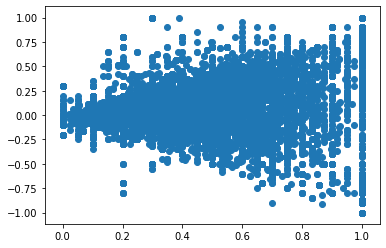

In [72]:
plt.scatter(df[' title_subjectivity'],df[' title_sentiment_polarity'])
plt.show()

* from above we can say that their is no perfect correlation between the title_subjectivity and title_sentiment_polarity

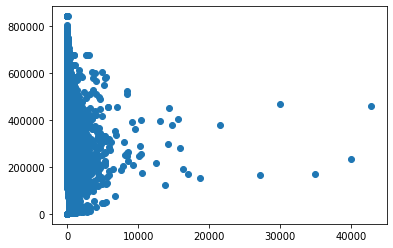

In [73]:
plt.scatter(df[' kw_avg_min'],df[' kw_avg_max'])
plt.show()

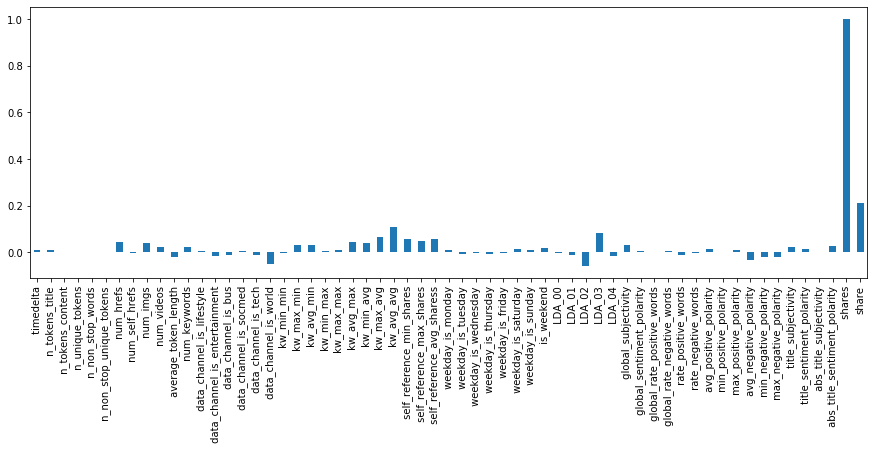

In [74]:
## plotting bar plot as per the correlation
plt.figure(figsize=(15,5))
df.corr()[' shares'].plot(kind='bar')
plt.show()

## CLUSTERING 

In [83]:
from sklearn.preprocessing import scale as scale

In [84]:
kmean=data.copy()

In [85]:
kmean.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [86]:
## droping unwanted column
kmean=kmean.drop(['url',' shares'],axis=1)

kmean.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [87]:
# scaling data 
scaled_kdf = scale(kmean)
scaled_kdf

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -0.97543219,
        -1.81071884,  0.13891975],
       [ 1.75788035, -0.66165665, -0.61879381, ..., -0.26907618,
         0.83774863, -0.68965812],
       [ 1.75788035, -0.66165665, -0.71219192, ..., -0.26907618,
         0.83774863, -0.68965812],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ...,  0.24463729,
        -1.56994907, -0.08705603],
       [-1.61808342, -2.08076053,  0.28759248, ..., -0.26907618,
         0.83774863, -0.68965812],
       [-1.61808342, -0.18862202, -0.82681689, ...,  0.67273184,
        -0.92789635,  0.41511238]])

In [88]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_kdf)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,2.338996e+06
1,2,2.207049e+06
2,3,2.121344e+06
3,4,2.002474e+06
4,5,1.924547e+06
5,6,1.807053e+06
6,7,1.743192e+06
7,8,1.686999e+06
8,9,1.655328e+06


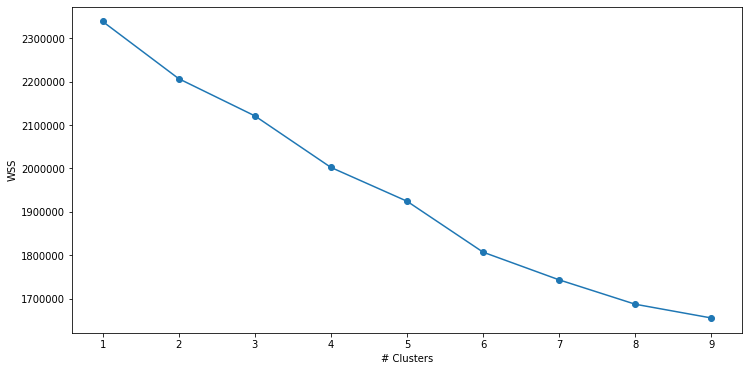

In [89]:
## plotting cluster 

plt.figure(figsize=(12,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

In [90]:
kcluster=KMeans(n_clusters=5 ,random_state=10)

In [91]:
kcluster.fit(scaled_kdf)  ## fitting the data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [92]:
kmean['clusters']=kcluster.fit_predict(scaled_kdf)  ## predicting the data

In [93]:
kmean.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,clusters
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,2
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,4
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,4
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,2
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [94]:
kmean.clusters.value_counts()

2    12970
0     9465
1     9271
4     7937
3        1
Name: clusters, dtype: int64

In [95]:
#3 checking correlation

kmean.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,clusters
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.013721
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,-0.004033
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,-0.012425
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.008759
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.007631
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.009375
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.028520
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.065531
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,-0.036727
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.050642


### PCA

In [96]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [97]:
share=data.copy()
share=share.drop('url',axis=1)
share.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [98]:
X=share.drop(' shares',axis=1)
y=share[' shares']

In [99]:
cor_mat = X.cov()
cor_mat

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
timedelta,4.586612e+04,-108.804750,-6.342897e+03,2.161108e+00,0.100075,2.660389,-2.019348,53.278379,-49.180292,0.823201,...,2.828733,0.836536,5.215821,-0.013855,3.865397,-1.291679,-1.105422,2.200691,0.467018,-0.133043
n_tokens_title,-1.088047e+02,4.469152,1.808589e+01,-3.958305e-02,-0.052574,-0.037407,-1.281572,-0.121076,-0.155609,0.446888,...,-0.010966,-0.003779,-0.011347,-0.004616,-0.017886,0.002303,0.052949,0.000134,-0.058651,0.019399
n_tokens_content,-6.342897e+03,18.085895,2.219423e+05,-7.856418e+00,43.157231,0.574090,2258.574639,553.359433,1341.156023,200.681762,...,6.654867,-8.785370,48.526849,-7.844984,-61.623303,10.148567,0.684925,2.921014,0.634679,1.432751
n_unique_tokens,2.161108e+00,-0.039583,-7.856418e+00,1.239539e+01,18.409751,11.492759,-0.173617,0.089857,0.550047,-0.008641,...,-0.000179,0.002308,-0.007899,0.000653,0.010120,-0.002456,-0.005340,-0.002181,-0.006143,-0.003359
n_non_stop_words,1.000747e-01,-0.052574,4.315723e+01,1.840975e+01,27.365777,17.071021,0.327289,0.274225,1.238256,-0.019323,...,0.001250,0.000337,0.002672,-0.000917,-0.001843,-0.000380,-0.009141,-0.002292,-0.008405,-0.005199
n_non_stop_unique_tokens,2.660389e+00,-0.037407,5.740901e-01,1.149276e+01,17.071021,10.659026,-0.184374,0.095461,0.386044,-0.012910,...,0.001594,0.001951,-0.001816,-0.000822,0.004092,-0.002089,-0.006203,-0.002522,-0.005284,-0.003947
num_hrefs,-2.019348e+00,-1.281572,2.258575e+03,-1.736165e-01,0.327289,-0.184374,128.414618,17.319627,32.263251,5.330857,...,0.222998,-0.066404,0.805121,-0.220214,-0.867051,0.059386,0.161487,0.117439,0.020202,0.144952
num_self_hrefs,5.327838e+01,-0.121076,5.533594e+02,8.985659e-02,0.274225,0.095461,17.319627,14.862113,7.642879,1.226653,...,0.039522,-0.019973,0.181423,-0.028668,-0.136610,0.014396,-0.014049,0.026836,0.006522,-0.005853
num_imgs,-4.918029e+01,-0.155609,1.341156e+03,5.500467e-01,1.238256,0.386044,32.263251,7.642879,69.046685,-2.298446,...,0.083781,-0.014627,0.319617,-0.076946,-0.329310,0.033795,0.153076,0.102149,-0.021585,0.119041
num_videos,8.232009e-01,0.446888,2.006818e+02,-8.641343e-03,-0.019323,-0.012910,5.330857,1.226653,-2.298446,16.874473,...,0.041845,-0.002960,0.127904,-0.060850,-0.164788,0.010676,0.081287,0.023968,-0.017047,0.051342


In [100]:
X_std = StandardScaler().fit_transform(X)
type(X_std)

numpy.ndarray

In [101]:
pca = PCA()

pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [102]:
pc_score = pca.transform(X_std)
pc_score.round(2)

array([[-1.36, -1.88, -1.97, ..., -0.  , -0.  ,  0.  ],
       [ 0.2 , -4.31, -1.14, ..., -0.  ,  0.  , -0.  ],
       [-3.73, -3.5 , -1.74, ...,  0.  , -0.  ,  0.  ],
       ...,
       [ 0.48,  2.64,  0.06, ..., -0.  ,  0.  ,  0.  ],
       [ 3.57,  0.24, -3.17, ..., -0.  ,  0.  ,  0.  ],
       [ 0.79,  0.61,  2.31, ...,  0.  ,  0.  , -0.  ]])

In [103]:
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var * 100, decimals = 1)
exp_var

array([8.3, 7. , 6.1, 5.1, 4.8, 4.4, 4.3, 3.9, 3.6, 3.5, 3.4, 3.2, 2.8,
       2.3, 2.3, 2.1, 2.1, 2.1, 2. , 2. , 1.9, 1.8, 1.8, 1.5, 1.5, 1.4,
       1.2, 1.1, 1.1, 1. , 1. , 0.9, 0.9, 0.8, 0.8, 0.7, 0.7, 0.6, 0.5,
       0.5, 0.4, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0. , 0. , 0. , 0. , 0. , 0. ])

In [104]:
pca.explained_variance_.round(3)

array([4.883, 4.122, 3.605, 3.002, 2.812, 2.595, 2.542, 2.293, 2.128,
       2.08 , 2.002, 1.885, 1.656, 1.38 , 1.365, 1.236, 1.229, 1.212,
       1.193, 1.173, 1.129, 1.085, 1.045, 0.911, 0.871, 0.813, 0.723,
       0.677, 0.656, 0.611, 0.574, 0.558, 0.535, 0.471, 0.462, 0.44 ,
       0.405, 0.364, 0.317, 0.301, 0.244, 0.24 , 0.217, 0.188, 0.182,
       0.129, 0.097, 0.08 , 0.075, 0.06 , 0.053, 0.037, 0.031, 0.026,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [105]:
np.cumsum(exp_var)

array([ 8.3, 15.3, 21.4, 26.5, 31.3, 35.7, 40. , 43.9, 47.5, 51. , 54.4,
       57.6, 60.4, 62.7, 65. , 67.1, 69.2, 71.3, 73.3, 75.3, 77.2, 79. ,
       80.8, 82.3, 83.8, 85.2, 86.4, 87.5, 88.6, 89.6, 90.6, 91.5, 92.4,
       93.2, 94. , 94.7, 95.4, 96. , 96.5, 97. , 97.4, 97.8, 98.2, 98.5,
       98.8, 99. , 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8])

In [106]:
np.cumsum(exp_var < 91)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59], dtype=int32)

In [107]:
labels = ['PC' + str(x) for x in range(1, len(exp_var) + 1)]

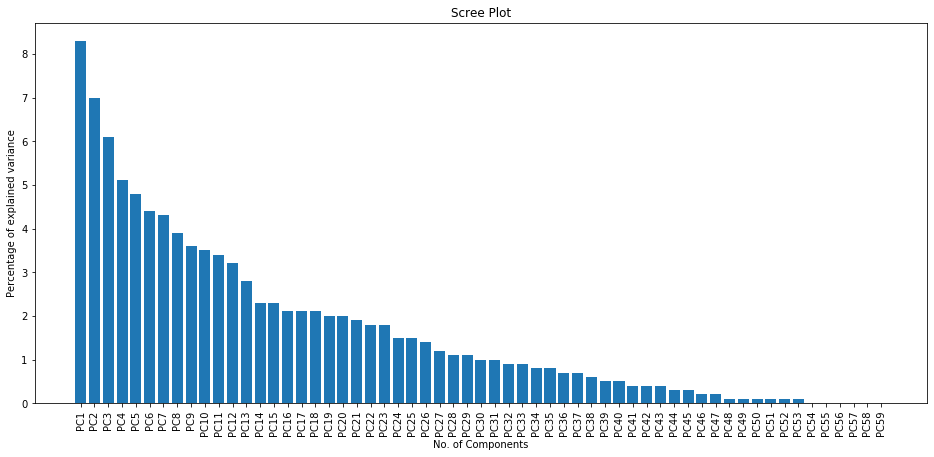

In [108]:
plt.figure(figsize = (16  ,7))
plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel('No. of Components')
plt.ylabel('Percentage of explained variance')
plt.title('Scree Plot')
plt.xticks(rotation=90 )
plt.show()

In [109]:
loadings = pca.components_

loadings.round(2)

array([[-0.16,  0.06, -0.13, ..., -0.08,  0.03, -0.07],
       [-0.19,  0.08,  0.1 , ..., -0.04, -0.03,  0.08],
       [-0.07,  0.01, -0.14, ...,  0.13, -0.07,  0.1 ],
       ...,
       [-0.  , -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.  , -0.  ,  0.  ],
       [-0.  , -0.  , -0.  , ..., -0.  , -0.  ,  0.  ]])

In [110]:
pc_score_df = pd.DataFrame(pc_score, columns = range(1,60,1))
pc_score_df.head()

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
0,-1.357847,-1.884241,-1.973965,-0.000721,0.431171,-3.606547,1.421225,-1.418664,0.461776,0.248742,...,-0.420356,0.506980,0.231596,0.040015,0.089610,0.012533,-0.000421,-0.000002,-1.509244e-16,5.102138e-16
1,0.196389,-4.305412,-1.135920,0.082724,-0.351637,-1.565918,3.365457,0.305641,1.897227,-1.308060,...,0.132749,0.209577,0.052971,0.019234,0.050089,0.013305,-0.007529,-0.000005,4.981032e-16,-4.769029e-17
2,-3.731178,-3.498195,-1.735067,-0.078505,-0.386993,-0.860636,2.504500,-0.273694,-0.266832,-0.607382,...,0.465992,0.172364,0.091662,0.032356,-0.016443,-0.013088,0.014719,0.000002,-3.623930e-16,3.408878e-16
3,-0.670098,-1.695272,-3.436230,-0.106087,1.187232,-2.169297,1.392603,-1.008090,-0.530943,-0.921162,...,0.112885,0.402018,0.207318,0.054664,-0.163071,-0.014537,-0.004088,0.000002,1.875728e-16,3.408878e-16
4,-4.169514,-3.718399,-1.441040,-0.131856,0.376861,0.343913,-2.743558,-1.432772,0.532728,-0.890977,...,-0.079708,0.117756,0.149479,-0.003655,0.165191,-0.010555,0.000676,-0.000002,-8.406826e-17,4.906124e-16


In [111]:
pc_score_df.columns=X.columns
pc_score_df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-1.357847,-1.884241,-1.973965,-0.000721,0.431171,-3.606547,1.421225,-1.418664,0.461776,0.248742,...,-0.420356,0.506980,0.231596,0.040015,0.089610,0.012533,-0.000421,-0.000002,-1.509244e-16,5.102138e-16
1,0.196389,-4.305412,-1.135920,0.082724,-0.351637,-1.565918,3.365457,0.305641,1.897227,-1.308060,...,0.132749,0.209577,0.052971,0.019234,0.050089,0.013305,-0.007529,-0.000005,4.981032e-16,-4.769029e-17
2,-3.731178,-3.498195,-1.735067,-0.078505,-0.386993,-0.860636,2.504500,-0.273694,-0.266832,-0.607382,...,0.465992,0.172364,0.091662,0.032356,-0.016443,-0.013088,0.014719,0.000002,-3.623930e-16,3.408878e-16
3,-0.670098,-1.695272,-3.436230,-0.106087,1.187232,-2.169297,1.392603,-1.008090,-0.530943,-0.921162,...,0.112885,0.402018,0.207318,0.054664,-0.163071,-0.014537,-0.004088,0.000002,1.875728e-16,3.408878e-16
4,-4.169514,-3.718399,-1.441040,-0.131856,0.376861,0.343913,-2.743558,-1.432772,0.532728,-0.890977,...,-0.079708,0.117756,0.149479,-0.003655,0.165191,-0.010555,0.000676,-0.000002,-8.406826e-17,4.906124e-16


In [112]:
pc_score_df.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
timedelta,1.000000e+00,3.013134e-17,6.673426e-16,1.850017e-16,-3.580350e-16,-3.520080e-16,9.316861e-17,-2.430636e-16,-3.354343e-16,2.746464e-16,...,6.078983e-16,-2.070685e-16,7.452867e-17,1.843961e-16,1.652973e-15,1.643376e-14,-3.599071e-14,3.651660e-12,-0.004626,0.026126
n_tokens_title,3.013134e-17,1.000000e+00,7.600965e-18,1.103558e-16,-1.105872e-15,9.311077e-16,-5.648165e-16,-5.536710e-18,-5.680427e-18,3.507245e-16,...,4.162508e-16,2.390597e-16,-7.501473e-16,-2.734426e-16,-1.060610e-15,2.693309e-14,5.107822e-16,2.152725e-12,-0.022554,-0.009485
n_tokens_content,6.673426e-16,7.600965e-18,1.000000e+00,-6.717155e-17,1.458506e-16,2.513112e-16,2.106877e-17,3.388639e-16,-1.254261e-16,2.613074e-16,...,-7.168460e-16,9.582452e-16,-1.001222e-15,-8.566453e-16,1.196016e-15,1.207172e-14,-1.377237e-14,-7.763729e-12,-0.015265,-0.015077
n_unique_tokens,1.850017e-16,1.103558e-16,-6.717155e-17,1.000000e+00,-8.755903e-16,3.204497e-16,7.717825e-17,2.849163e-16,-6.887557e-17,2.206010e-16,...,-1.691340e-16,-1.760279e-15,-1.119076e-15,1.186325e-15,2.433360e-16,-1.209776e-13,-1.026575e-13,-6.618099e-12,0.008230,0.013682
n_non_stop_words,-3.580350e-16,-1.105872e-15,1.458506e-16,-8.755903e-16,1.000000e+00,3.239358e-16,2.437042e-16,-3.516958e-16,2.597714e-16,1.480610e-16,...,2.161773e-16,7.383041e-16,-2.945780e-15,-8.021829e-16,-9.119429e-16,8.002292e-16,2.444436e-14,-6.878919e-13,0.028903,-0.062683
n_non_stop_unique_tokens,-3.520080e-16,9.311077e-16,2.513112e-16,3.204497e-16,3.239358e-16,1.000000e+00,1.348377e-15,-3.992164e-16,1.422638e-16,1.351967e-16,...,-4.091759e-17,6.698029e-16,6.457221e-16,-1.849677e-15,-1.507773e-15,4.925828e-15,3.238309e-14,1.306230e-12,0.015670,-0.015485
num_hrefs,9.316861e-17,-5.648165e-16,2.106877e-17,7.717825e-17,2.437042e-16,1.348377e-15,1.000000e+00,-4.649858e-16,-2.308779e-16,-8.848808e-17,...,1.631827e-16,1.790947e-15,1.466195e-15,-7.207196e-16,-1.778089e-15,2.255425e-16,4.784286e-15,7.786449e-12,0.070730,0.144172
num_self_hrefs,-2.430636e-16,-5.536710e-18,3.388639e-16,2.849163e-16,-3.516958e-16,-3.992164e-16,-4.649858e-16,1.000000e+00,-4.672664e-16,-5.575095e-16,...,-6.106778e-16,1.265234e-15,-1.248118e-15,1.358096e-15,5.573327e-16,-1.935114e-15,-2.717837e-14,1.807157e-11,-0.010051,-0.045519
num_imgs,-3.354343e-16,-5.680427e-18,-1.254261e-16,-6.887557e-17,2.597714e-16,1.422638e-16,-2.308779e-16,-4.672664e-16,1.000000e+00,1.044083e-16,...,2.210145e-16,-4.432322e-16,1.606495e-15,-8.352926e-16,6.144962e-16,-1.265761e-15,-3.736507e-16,9.515477e-12,-0.062059,-0.184110
num_videos,2.746464e-16,3.507245e-16,2.613074e-16,2.206010e-16,1.480610e-16,1.351967e-16,-8.848808e-17,-5.575095e-16,1.044083e-16,1.000000e+00,...,-2.482012e-16,2.129895e-16,-2.211219e-15,-5.601963e-16,-4.509296e-16,2.003744e-14,-3.717586e-14,-9.808505e-13,0.025989,0.205216


In [113]:
pc_score_df1=pc_score_df.iloc[:,:38 ]

In [114]:
pc_score_df1.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,-1.357847,-1.884241,-1.973965,-0.000721,0.431171,-3.606547,1.421225,-1.418664,0.461776,0.248742,...,0.276220,-0.314631,-0.178382,0.172706,0.641476,0.607443,-0.048311,0.179529,-0.809936,0.095549
1,0.196389,-4.305412,-1.135920,0.082724,-0.351637,-1.565918,3.365457,0.305641,1.897227,-1.308060,...,0.571999,0.453127,0.169180,0.222453,-0.439530,0.332776,0.871263,0.013802,-0.410272,0.410224
2,-3.731178,-3.498195,-1.735067,-0.078505,-0.386993,-0.860636,2.504500,-0.273694,-0.266832,-0.607382,...,-0.389942,0.474048,-0.796810,0.285037,0.440288,-0.187458,-0.570950,-0.692835,-0.679144,-0.954343
3,-0.670098,-1.695272,-3.436230,-0.106087,1.187232,-2.169297,1.392603,-1.008090,-0.530943,-0.921162,...,0.213592,0.055496,-0.286829,-0.184335,0.378830,0.389968,0.163563,-0.345194,-0.838242,0.910902
4,-4.169514,-3.718399,-1.441040,-0.131856,0.376861,0.343913,-2.743558,-1.432772,0.532728,-0.890977,...,0.756572,0.648606,-1.867508,0.769125,-0.075580,-0.718958,-0.019459,0.301896,-0.368949,-0.277088


In [115]:
scaled_kdf = scale(pc_score_df1)
scaled_kdf

array([[-0.61451268, -0.92813172, -1.03965059, ...,  0.27066831,
        -1.27233671,  0.15841323],
       [ 0.08887879, -2.12074268, -0.5982679 , ...,  0.02080883,
        -0.64450001,  0.68012152],
       [-1.68859736, -1.72312668, -0.91382785, ..., -1.04455899,
        -1.06687446, -1.58223068],
       ...,
       [ 0.21510155,  1.30265864,  0.03397932, ..., -0.84404052,
         1.65160156,  0.33660665],
       [ 1.61740038,  0.1206625 , -1.6679068 , ...,  0.16855613,
         1.9141042 ,  0.51207154],
       [ 0.35548034,  0.30165801,  1.21629442, ..., -0.67191234,
         1.80528951,  1.12650574]])

In [116]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_kdf)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,1.506472e+06
1,2,1.466828e+06
2,3,1.427185e+06
3,4,1.392322e+06
4,5,1.355344e+06
5,6,1.323856e+06
6,7,1.278120e+06
7,8,1.243509e+06
8,9,1.221300e+06


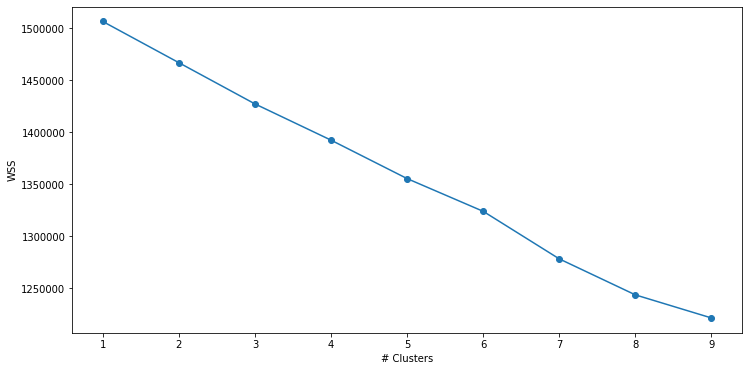

In [117]:
plt.figure(figsize=(12,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

In [118]:
kcluster=KMeans(n_clusters=5,random_state=10)

In [119]:
kcluster.fit(scaled_kdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [120]:
pc_score_df['clusters']=kcluster.fit_predict(scaled_kdf)

In [121]:
pc_score_df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,clusters
0,-1.357847,-1.884241,-1.973965,-0.000721,0.431171,-3.606547,1.421225,-1.418664,0.461776,0.248742,...,0.506980,0.231596,0.040015,0.089610,0.012533,-0.000421,-0.000002,-1.509244e-16,5.102138e-16,4
1,0.196389,-4.305412,-1.135920,0.082724,-0.351637,-1.565918,3.365457,0.305641,1.897227,-1.308060,...,0.209577,0.052971,0.019234,0.050089,0.013305,-0.007529,-0.000005,4.981032e-16,-4.769029e-17,4
2,-3.731178,-3.498195,-1.735067,-0.078505,-0.386993,-0.860636,2.504500,-0.273694,-0.266832,-0.607382,...,0.172364,0.091662,0.032356,-0.016443,-0.013088,0.014719,0.000002,-3.623930e-16,3.408878e-16,4
3,-0.670098,-1.695272,-3.436230,-0.106087,1.187232,-2.169297,1.392603,-1.008090,-0.530943,-0.921162,...,0.402018,0.207318,0.054664,-0.163071,-0.014537,-0.004088,0.000002,1.875728e-16,3.408878e-16,4
4,-4.169514,-3.718399,-1.441040,-0.131856,0.376861,0.343913,-2.743558,-1.432772,0.532728,-0.890977,...,0.117756,0.149479,-0.003655,0.165191,-0.010555,0.000676,-0.000002,-8.406826e-17,4.906124e-16,4


In [122]:
pc_score_df.clusters.value_counts()

4    14816
2     7435
1     7389
0     7267
3     2737
Name: clusters, dtype: int64